In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Flight Price Prediction.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Understanding dataset

In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Missing values

In [7]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

- No missing values

### Duplicates

In [8]:
df.duplicated().sum()

0

- No duplicates

### Outliers

#### Unnamed: 0

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unnamed: 0'>

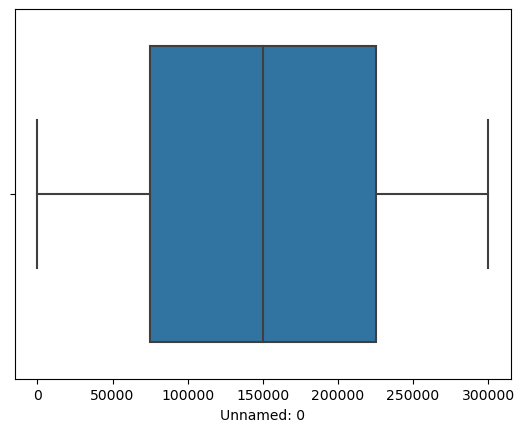

In [13]:
sns.boxplot(df['Unnamed: 0'])

- No outliers in Unnamed:0

#### Duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

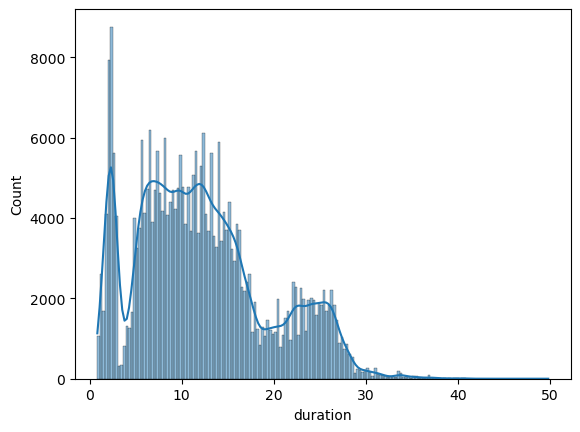

In [20]:
sns.histplot(df['duration'],kde=True)

#### Checking Outliers 

In [21]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

outlier = df[(df['duration']<lower_bound)|(df['duration']>upper_bound)]

In [22]:
outlier

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10534,10534,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,31.25,4,12222
10535,10535,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,33.17,4,12222
10540,10540,Air_India,AI-9887,Delhi,Early_Morning,two_or_more,Evening,Bangalore,Economy,36.92,4,12321
10891,10891,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,31.25,6,12222
10892,10892,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,33.17,6,12222
...,...,...,...,...,...,...,...,...,...,...,...,...
296064,296064,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,5,55377
296297,296297,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,10,55377
296391,296391,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,12,55377
296716,296716,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,19,55377


In [28]:
print(f'length of outliers : {outlier.shape[0]}')

length of outliers : 2110


#### Capping --> Winsorization

In [29]:
upper_limit = df['duration'].quantile(0.9)
upper_limit

23.67

In [30]:
lower_limit = df['duration'].quantile(0.01)
lower_limit

1.33

In [31]:
df['duration'] = np.where(df['duration']<=lower_limit,lower_limit,
                         np.where(df['duration']>=upper_limit,upper_limit,
                                 df['duration']))

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

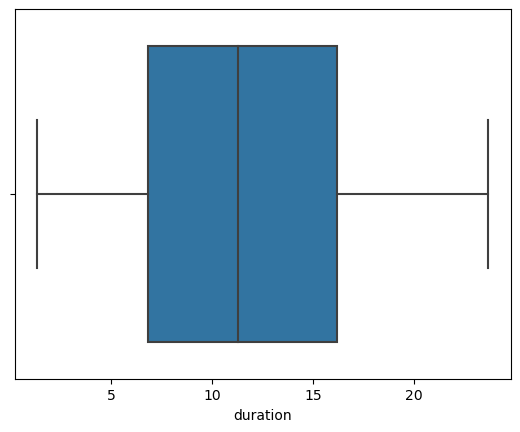

In [32]:
sns.boxplot(df['duration'])

#### days_left

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_left'>

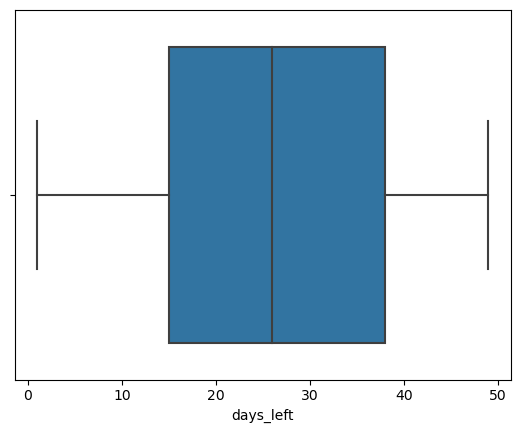

In [34]:
sns.boxplot(df['days_left'])

- No outliers in days_left

#### price

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

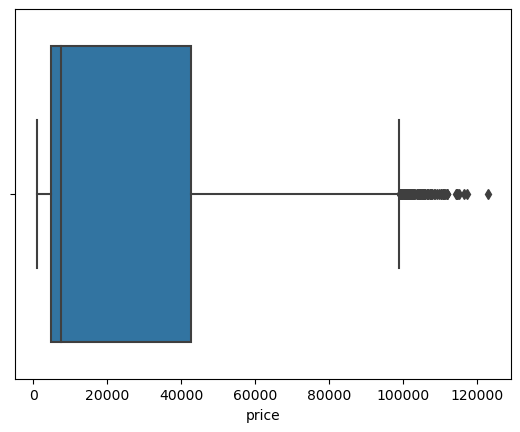

In [35]:
sns.boxplot(df['price'])

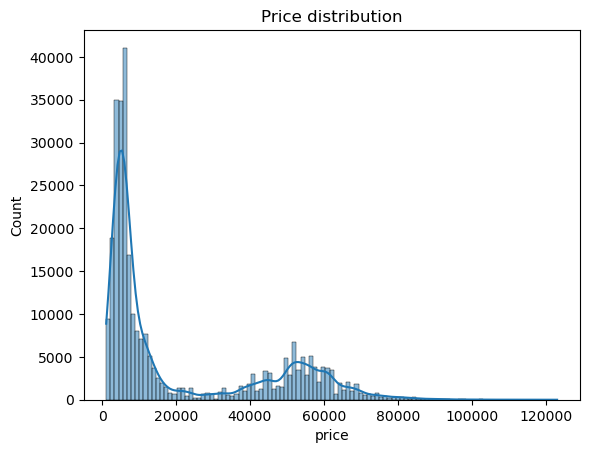

In [36]:
sns.histplot(df['price'],kde=True)
plt.title('Price distribution')
plt.show()

In [37]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

outlier = df[(df['price']<lower_bound)|(df['price']>upper_bound)]
print(f'outliers in price:{outlier}')
number_of_outlier = outlier.shape[0]
print(f'Number of outlier:{number_of_outlier}')

outliers in price:        Unnamed: 0  airline  flight source_city departure_time        stops  \
215858      215858  Vistara  UK-809       Delhi        Evening  two_or_more   
215859      215859  Vistara  UK-809       Delhi        Evening  two_or_more   
216025      216025  Vistara  UK-817       Delhi        Evening  two_or_more   
216094      216094  Vistara  UK-995       Delhi        Morning          one   
216095      216095  Vistara  UK-963       Delhi        Morning          one   
...            ...      ...     ...         ...            ...          ...   
293474      293474  Vistara  UK-836     Chennai        Morning          one   
296001      296001  Vistara  UK-838     Chennai          Night          one   
296081      296081  Vistara  UK-832     Chennai  Early_Morning          one   
296170      296170  Vistara  UK-838     Chennai          Night          one   
296404      296404  Vistara  UK-838     Chennai          Night          one   

       arrival_time destination_c

#### Capping --> Winsorization

In [39]:
upper_limit = df['price'].quantile(0.99)
upper_limit

76736.0

In [40]:
lower_limit = df['price'].quantile(0.001)
lower_limit

1106.0

In [41]:
df['price'] = np.where(df['price']<=lower_limit,lower_limit,
                      np.where(df['price']>=upper_limit,upper_limit,
                              df['price']))

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

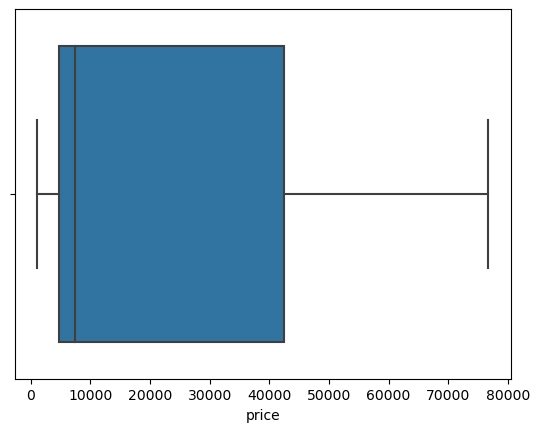

In [42]:
sns.boxplot(df['price'])

### Encoding Categorical columns

In [43]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [44]:
airline_mapping = {'Vistara':0,'Air_India':1,'Indigo':2,'GO_FIRST':3,'AirAsia':4,'SpiceJet':5}

In [46]:
df['airline_encoded'] = df['airline'].map(airline_mapping)

In [48]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_encoded
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,5
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,5
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,4
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,0


In [49]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [50]:
source_city_mapping = {'Delhi':0,'Mumbai':1,'Bangalore':2,'Kolkata':3,'Hyderabad':4,'Chennai':5}

In [51]:
df['source_city_encoded'] = df['source_city'].map(source_city_mapping)

In [52]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_encoded,source_city_encoded
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,5,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,5,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,4,0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,0,0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,0,0


In [53]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [58]:
label_encoder = LabelEncoder()

df['class_encoded'] = label_encoder.fit_transform(df['class'])

In [59]:
df['class_encoded'] = df['class_encoded'].map({0:1,1:0})

In [60]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_encoded,source_city_encoded,class_encoded
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,5,0,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,5,0,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,4,0,0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,0,0,0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,0,0,0


In [61]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_encoded,source_city_encoded,class_encoded
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265.0,0,5,1
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,76736.0,0,5,1
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,76736.0,0,5,1
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,76736.0,0,5,1
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,76736.0,0,5,1


In [67]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [64]:
df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [65]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [66]:
df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [68]:
destination_city_mapping = {'Delhi':0,'Mumbai':1,'Bangalore':2,'Kolkata':3,'Hyderabad':4,'Chennai':5}

In [69]:
df['destination_city_encoded'] = df['destination_city'].map(destination_city_mapping)

In [70]:
departure_time_mapping = {'Morning':0,'Early_Morning':1,'Evening':2,'Night':3,'Afternoon':4,'Late_Night':5}

In [71]:
df['departure_time_encoded'] = df['departure_time'].map(departure_time_mapping)

In [72]:
stops_mapping = {'one':0,'zero':1,'two_or_more':2}

In [73]:
df['stop_encoded'] = df['stops'].map(stops_mapping)

In [74]:
arrival_time_mapping = {'Morning':0,'Early_Morning':1,'Evening':2,'Night':3,'Afternoon':4,'Late_Night':5}

In [75]:
df['arrival_time_encoded'] = df['arrival_time'].map(arrival_time_mapping)

In [76]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_encoded,source_city_encoded,class_encoded,destination_city_encoded,departure_time_encoded,stop_encoded,arrival_time_encoded
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0,5,0,0,1,2,1,3
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0,5,0,0,1,1,1,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0,4,0,0,1,1,1,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0,0,0,0,1,0,1,4
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0,0,0,0,1,0,1,0
